In [28]:
import matplotlib.pyplot as plt
import numpy as np
import random

import torch
import torchvision
import torchvision.transforms as transforms

# Support functions and definitions

In [57]:
def imshow(img):
    img = img*.24  + 0.5  #approximately the mean and sd from original dataset
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

In [60]:
def mean_sd_CIFAR10():
    cifar_trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True,transform=transforms.ToTensor())
    imgs = [item[0] for item in cifar_trainset]
    imgs = torch.stack(imgs, dim=0).numpy()
    
    # calculate mean over each channel (r,g,b)
    mean_r = imgs[:,0,:,:].mean()
    mean_g = imgs[:,1,:,:].mean()
    mean_b = imgs[:,2,:,:].mean()
    print(mean_r,mean_g,mean_b)
    
    # calculate std over each channel (r,g,b)
    std_r = imgs[:,0,:,:].std()
    std_g = imgs[:,1,:,:].std()
    std_b = imgs[:,2,:,:].std()
    print(std_r,std_g,std_b)
#mean_sd_CIFAR10()

In [42]:
#The above code returns the following values for mean and sd of channels
#0.49139968 0.48215827 0.44653124
#0.24703233 0.24348505 0.26158768

In [30]:
#Define classes for target variable
classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

In [31]:
#Seed
seed = 0

# Load data

In [56]:
#Load image data and store it in ./data/directory
transform = transforms.Compose([transforms.ToTensor(),
                              transforms.Normalize((0.49139968, 0.48215827, 0.44653124), (0.24703233, 0.24348505, 0.26158768))])
                                #Normal standarization

trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, 
                                        transform=transform)
testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, 
                                       transform=transform)

#Data shape
print('Size Train data: ',trainset.data.shape)
print('Size Test data: ', testset.data.shape)

Files already downloaded and verified
Files already downloaded and verified
Size Train data:  (50000, 32, 32, 3)
Size Test data:  (10000, 32, 32, 3)


In [45]:
#Load downloaded data from ./data directory and shuffle it
batch_size = 5

trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=True, num_workers=2)

#Data shape
print('Size Train data: ',trainloader.dataset.data.shape)
print('Size Test data: ', testloader.dataset.data.shape)

Size Train data:  (50000, 32, 32, 3)
Size Test data:  (10000, 32, 32, 3)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


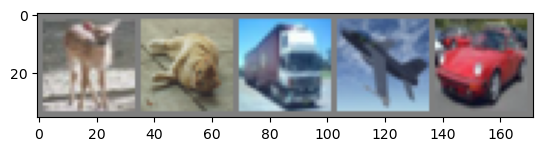

deer  cat   truck plane car  


In [59]:
# Plot some random training images
torch.manual_seed(seed)
dataiter = iter(trainloader)
images, labels = next(dataiter)

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join(f'{classes[labels[j]]:5s}' for j in range(batch_size)))

In [50]:
for i, data in enumerate(trainloader, 0):
    # get the inputs; data is a list of [inputs, labels]
    inputs, labels = data

    print(inputs)
    print(labels)
    
    if i == 1:
        break

tensor([[[[ 0.8524,  0.8365,  0.8365,  ...,  1.2969,  1.1540,  1.2969],
          [ 0.9159,  0.9000,  0.8682,  ...,  1.2810,  1.3762,  1.7255],
          [ 1.0111,  0.9794,  0.9794,  ...,  1.4874,  1.6937,  1.9001],
          ...,
          [ 0.4396,  0.4079,  0.3444,  ...,  0.7730,  0.7889,  0.8206],
          [ 0.5190,  0.4714,  0.4872,  ...,  0.6301,  0.6777,  0.7254],
          [ 0.3285,  0.3602,  0.3920,  ...,  0.6142,  0.6301,  0.7095]],

         [[ 1.4826,  1.4664,  1.4664,  ...,  1.5309,  1.4826,  1.5953],
          [ 1.4987,  1.4664,  1.4826,  ...,  1.5309,  1.5631,  1.8047],
          [ 1.5148,  1.4987,  1.5148,  ...,  1.7241,  1.7886,  1.9013],
          ...,
          [ 0.7900,  0.7256,  0.6289,  ...,  1.0316,  1.0638,  1.0960],
          [ 0.8383,  0.7417,  0.7578,  ...,  0.9672,  1.0155,  1.0638],
          [ 0.6934,  0.6773,  0.7095,  ...,  0.9994,  1.0155,  1.0960]],

         [[ 1.9359,  1.9059,  1.9209,  ...,  1.8010,  1.8310,  1.9209],
          [ 1.9359,  1.9209,  